In [2]:
import matplotlib
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
matplotlib.rcParams.update({'font.size': 22})

Display blank figure

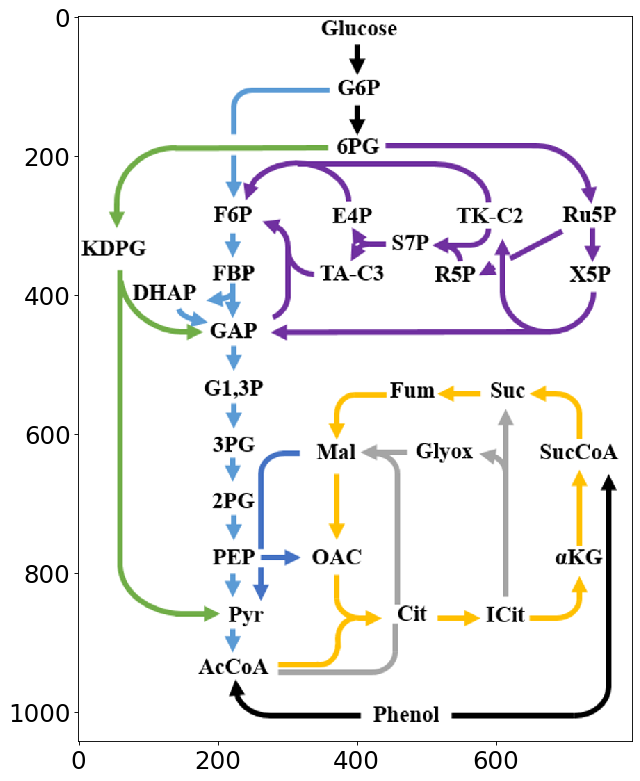

In [3]:
fig, ax = plt.subplots(figsize=(15, 12), dpi=80) 
img = mpimg.imread('./unlabeled_flux_map.png')
imgplot = plt.imshow(img)

In [29]:
annotation_locations = pd.DataFrame([
    ['Glucose Uptake', (50, 460), 100],   
    ['G6P -> 6PG', (50, 380), 100],    
    ['G6P -> Ru5P', (275, 350), 100],
    ['G6P -> F6P', (-150, 430), 100],
    # ED Pathway
    ['6PG -> KDPG', (-300, 350), 100],
    ['KDPG -> GAP + PYR', (-300, 50), 100],
    # Glycolysis
    ['F6P -> FBP', (-220, 195), 110],
    ['FBP -> GAP + DHAP', (-140, 115), 101],
    ['DHAP -> GAP',       (-270, 150), 102],
    ['GAP -> G1,3P', (-220, 30), 110],
    ['G1,3P -> G3P', (-220, -55), 110],
    ['G3P -> G2P', (-220, -135), 110],
    ['G2P -> PEP', (-220, -215), 110],
    ['PEP -> PYR', (-220, -295), 110],
    ['PYR -> ACCOA', (-220, -370), 110],
    # Pentose Phosphate
    ['Ru5P -> X5P', (380, 190), 85],
    ['Ru5P -> R5P', (270, 230), 85],
    ['X5P -> GAP + TKC2', (270, 100), 85],
    ['S7P -> E4P', (50, 230), 81],
    ['R5P -> S7P', (120, 230), 81],
    ['E4P -> F6P', (10, 280), 85],
    ['GAP -> F6P', (-70, 190), 85],
    # TCA Cycle #
    ['AcCoA + OAC -> CIT',( -55, -340), 85],
    ['CIT -> ICIT',( 145, -310), 85],
    ['ICIT -> AKG',( 290, -310), 85],
    ['AKG -> SucCoA',( 290, -195), 85],
    ['AKG -> Suc',( 290, -55), 85],
    ['Suc -> Fum',( 160, -55), 85],
    ['Fum -> Mal',( 10, -55), 85],
    ['Mal -> OAC',( -60, -180), 85],
    # Anaplerotic
    ['Mal -> PYR',( -100, -85), 85],
    ['PEP -> OAC',( -100, -230), 85],
    # Glyoxylate
    ['ICIT -> Glyox + Suc',( 180, -140), 85],
    ['Glyox + AcCoA -> Mal',( 90, -140), 85],
    
    ['Phenol uptake',( 80, -450), 85]
    
], columns=['reaction', 'location', 'value'])
annotation_locations

,reaction,location,value
0,Glucose Uptake,"(50, 460)",100
1,G6P -> 6PG,"(50, 380)",100
2,G6P -> Ru5P,"(275, 350)",100
3,G6P -> F6P,"(-150, 430)",100
4,6PG -> KDPG,"(-300, 350)",100
5,KDPG -> GAP + PYR,"(-300, 50)",100
6,F6P -> FBP,"(-220, 195)",110
7,FBP -> GAP + DHAP,"(-140, 115)",101
8,DHAP -> GAP,"(-270, 150)",102
9,"GAP -> G1,3P","(-220, 30)",110


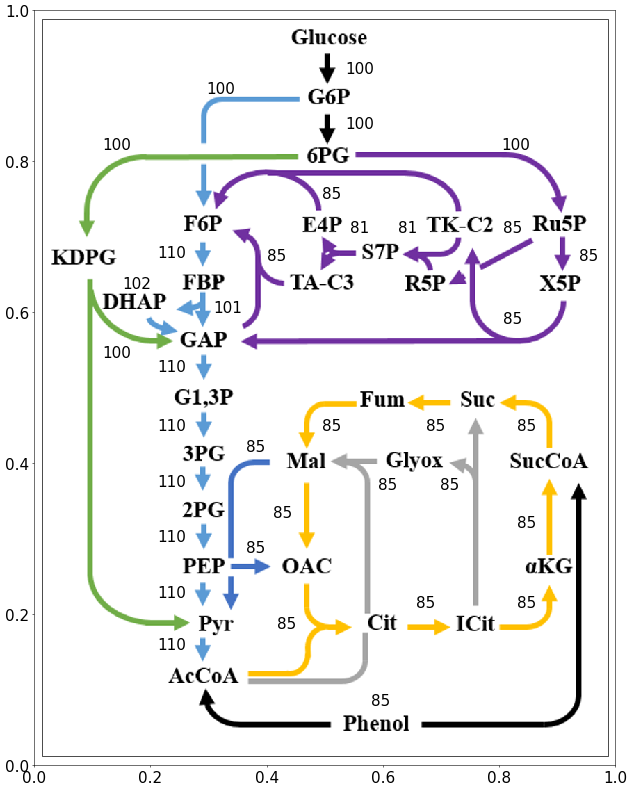

In [30]:
fig, ax = plt.subplots(figsize=(15, 20), dpi=50)
xy = (0.5, 0.5)
arr_img = plt.imread('./unlabeled_flux_map.png')
imagebox = OffsetImage(arr_img)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, xy)
ax.add_artist(ab)

for _, row in annotation_locations.iterrows():
    
    offsetbox = TextArea(row.value)
    ab = AnnotationBbox(offsetbox, xy,
                        xybox=row.location,
                        xycoords='data',
                        boxcoords="offset points",
                        frameon=False)
    ax.add_artist(ab)

# Fix the display limits to see everything
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()


Need to have relations between reaction, location, and value

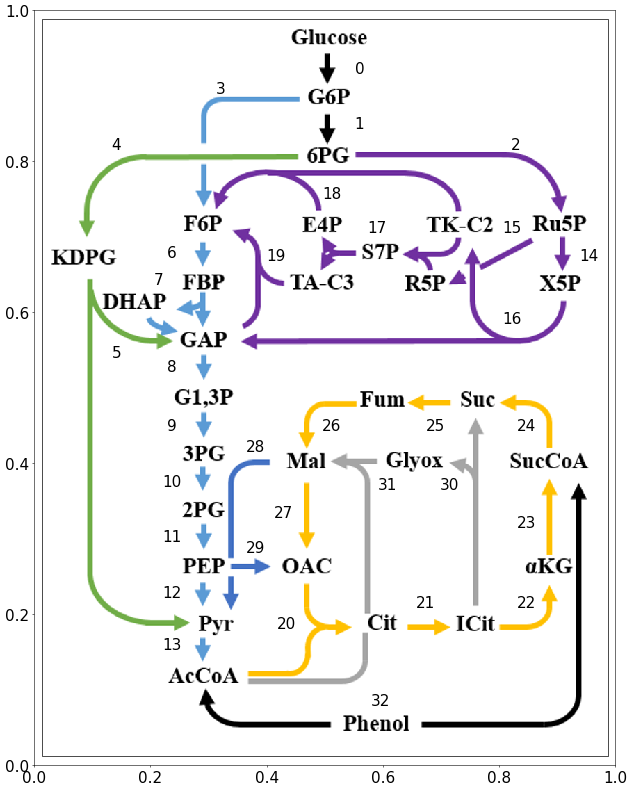

In [7]:
fig, ax = plt.subplots(figsize=(15, 20), dpi=50)
xy = (0.5, 0.5)
arr_img = plt.imread('./unlabeled_flux_map.png')
imagebox = OffsetImage(arr_img)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, xy)
ax.add_artist(ab)

for index, row in annotation_locations.iterrows():    
    offsetbox = TextArea(index)
    ab = AnnotationBbox(offsetbox, xy,
                        xybox=row.location,
                        xycoords='data',
                        boxcoords="offset points",
                        frameon=False)
    ax.add_artist(ab)

# Fix the display limits to see everything
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()


Need a function to go from 